In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line



In [28]:
#You may find lines or sections of the following code useful:
def useful_code():
  x_low = 0
  x_high = 2*np.pi
  n_x_values = 30
  #define a set of n_x_values points between x_low and x_high (0 to
  #2 pi in this case):
  x = np.linspace(x_low,x_high,n_x_values)

  #Normalise a vector (i.e. turn it into a unit vector):
  v = np.array([4, 8, 1])
  v_hat = v/np.linalg.norm(v)
  print("Normalised vector: ", v_hat)

  #find the minimum value within vector v:
  print("Minimum of v (should be 1): ", np.min(v))
  #find where the minimum occured - NB zero indexed
  #(NB can also do argmax() for maximum point)
  print("Minimum occurs at element: ", np.argmin(v,axis=0))

  #calculate y values for the given x values, using y = cos(x)
  y = np.cos(x)
  integral = np.trapz(y, x=x) #integrate y using the trapezium rule
  print("Integral (should be approx 0):",integral)

  loc = np.pi #set location to be pi (3.14...)
  #interpolate function y(x) to find value at loc - i.e. y(loc):
  val = np.interp(loc, x, y)
  print("Value at pi (should be approx -1):",val)

  #summing and squaring:
  print("Sum of y squared: ", np.sum(y**2))

  #do a for loop
  for cnt in range(4):
    print("Iteration: ", cnt)

  #Reshape matrix A such that it has the same shape as B:
  A = np.array([[1,2],[3,4]])
  print("A before reshaping:\n",A)
  B = np.array([6,7,8,9])
  print("B:\n",B)
  A = np.reshape(A,B.shape)
  print("A after reshaping to match B:\n",A)

  #Multiply two matrices together:
  A = np.array([[1,2],[3,4]])
  B = np.array([[5,6],[7,8]])
  C = np.matmul(A, B)
  print("Multiplication of \n", A, "\nand\n", B, "\ngives:\n", C)

  #Plotting functions/points:
  fig, ax = plt.subplots()  #define a figure
  #plot the points given by vectors x and y with a blue
  #solid line ('b-'). k is black, r red and g green.
  plt.plot(x, y, 'b-')
  plt.plot(x, y, 'k.')      #as above, but plot as black dots


  #2D plotting and routines:

  #generate two random sets of values x1 and x2
  n_points = 20
  x1 = np.random.normal(loc=0,scale=1,size=n_points)
  x2 = np.random.normal(loc=0,scale=1,size=n_points)
  #Combine two vectors x1 and x2, of length n_points, into
  # a matrix of size n_points x 2
  X = np.concatenate((np.reshape(x1,[n_points,1]),
                      np.reshape(x2,[n_points,1])),axis=1)

  y = np.zeros([n_points]) #define y and set all values to zero
  #now put all the class values to 1 where the x1 value is
  # greater than 0.2
  y[x1 > 0.2] = 1

  #points in x and y:
  npx = 200
  npy = 200
  #generate the grid to sample 2D space:
  Xgrid,x1line,x2line = gen_sample_grid(npx,npy,3)
  #generate an arbitrary 2D function - here do x1^2 + x2:
  z = Xgrid[:,0]**2+Xgrid[:,1]
  #and reshape it back to the grid
  z = z.reshape([npx,npy])
  fig, ax = plt.subplots()
  #plot the values in z sampled at values given by the
  #vectors x1line, x2line:
  plt.contourf(x1line, x2line, z)
  #plot scattered values in the n_points x 2 matrix X where
  #corresponding values in the y vector equal 0:
  ax.scatter(X[y == 0, 0], X[y == 0, 1])
  #then plot where y == 1:
  ax.scatter(X[y == 1, 0], X[y == 1, 1])

#uncomment to run the code if you wish:
#useful_code()

#Q1

0.30612244897959184 0.44897959183673475 0.163265306122449


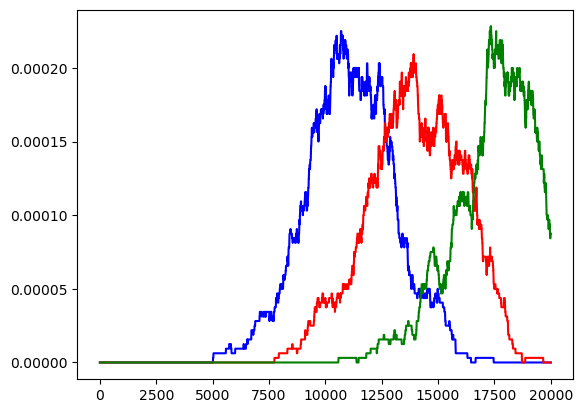

In [29]:
#Q1:

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/ecqtu/d1.csv")
a = np.array(df['a'])
b = np.array(df['b'])
c = np.array(df['c'])

n_points = a.size

## Your code here:
#(a)
def phi(xarray, xp, h):
    u = (xarray - xp)/h
    return np.where(np.abs(u) < 0.5, 1, 0)

h = 800
xrange = np.linspace(0, 20000, 5001)

atot = []
btot = []
ctot = []
for xp in xrange:
    atot.append(np.sum(phi(a, xp, h) / h))
    btot.append(np.sum(phi(b, xp, h) / h))
    ctot.append(np.sum(phi(c, xp, h) / h))

anorm = np.array(atot) / (n_points)
bnorm = np.array(btot) / (n_points)
cnorm = np.array(ctot) / (n_points)

plt.plot(xrange, anorm, c="blue")
plt.plot(xrange, bnorm, c="red")
plt.plot(xrange, cnorm, c="green")
         



                
    
#(b)
pwa = 0.5
pwb = 0.2
pwc = 0.3

px_wa = np.interp(15000, xrange, anorm)
px_wb = np.interp(15000, xrange, bnorm)
px_wc = np.interp(15000, xrange, cnorm)

px = px_wa * pwa + px_wb * pwb + px_wc * pwc

pwa_x = (px_wa * pwa) / px
pwb_x = (px_wb * pwb) / px
pwc_x = (px_wc * pwb) / px

print(pwa_x, pwb_x, pwc_x)


#Q2
(a)

(b)

#Q3

In [30]:
#Q3:

w = np.array([0.8, -0.6])
w0 = 5

df = pd.read_csv("http://pogo.software/me4ml/ecqtu/d3.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
y = np.array(df['y'])

n_points = x1.size

#Your code here...

w = np.array([0.8, -0.6])
w0 = 5
X = np.array([x1, x2])

g = np.matmul(w.T, X) + w0
g_y = g * y

M = g_y.min()
print(M)



0.3077600255541997


#Q4



#Q5

In [31]:
#Q5

df = pd.read_csv("http://pogo.software/me4ml/ecqtu/d5.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
y = np.array(df['y'])

n_points = y.size

#Your code here...
w0 = np.array([0.1, -1])
w1 = np.array([-4, 0.5])
w2 = np.array([0.3, 0.1])

w00 = 0.1
w01 = 0.5
w02 = 0

X = np.array([x1, x2])
print(X.shape)
g0 = np.matmul(w0.T, X) + w00
g1 = np.matmul(w1.T, X) + w01
g2 = np.matmul(w2.T, X) + w02

y_pred = []
for c0, c1, c2 in zip(g0, g1, g2):
    if c0 > c1 and c0 > c2:
        y_pred.append(0)
    elif c1 > c0 and c1 > c2:
        y_pred.append(1)
    else:
        y_pred.append(2)

for i in range(len(y_pred)):
    if y[i] != y_pred[i]:
        print(X[:, i])





(2, 45)
[-0.26332649 -0.89562782]


#Q6

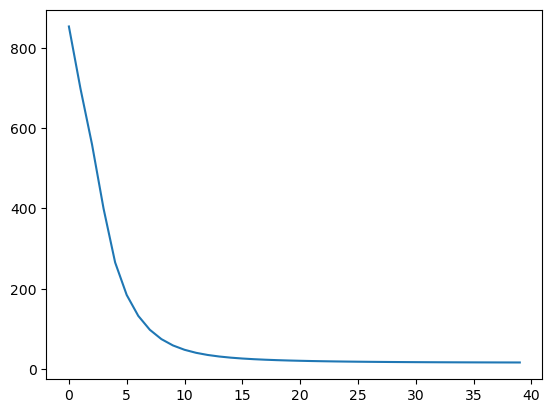

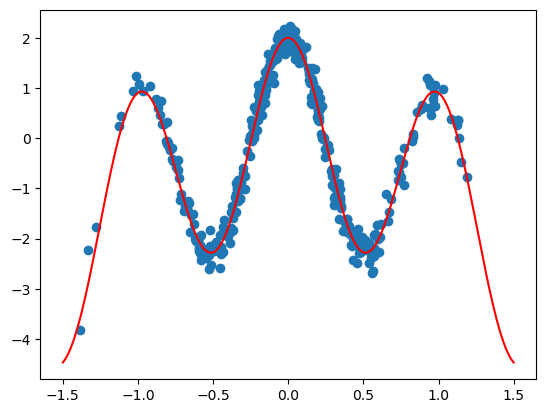

In [32]:
df = pd.read_csv("http://pogo.software/me4ml/ecqtu/d6.csv")
x = np.array(df['x'])
y = np.array(df['y'])

n_points = y.size

#Your code here...
steps = 40
step = 0.0005
A = -2
B = 0
C = 2.5

def f(x, A, B, C):
    return A * x ** 2 + B * np.cos(C * np.pi * x)
E2list = []
for _ in range(steps):
    r = f(x, A, B, C) - y
    E2 = np.sum(r**2)
    E2list.append(E2)
    dE2dA = np.sum(2 * r * x**2)
    dE2dB = np.sum(2 * r * np.cos(C * np.pi * x))
    dE2dC = np.sum(2 * r * -x * np.pi * B * np.sin(C * np.pi * x))

    A -= step * dE2dA
    B -= step * dE2dB
    C -= step * dE2dC
plt.plot(range(steps), E2list)
plt.show()
plt.scatter(x, y)
xrange = np.linspace(-1.5, 1.5, len(x))
plt.plot(xrange, f(xrange, A, B, C), c="red")

    



#Q7

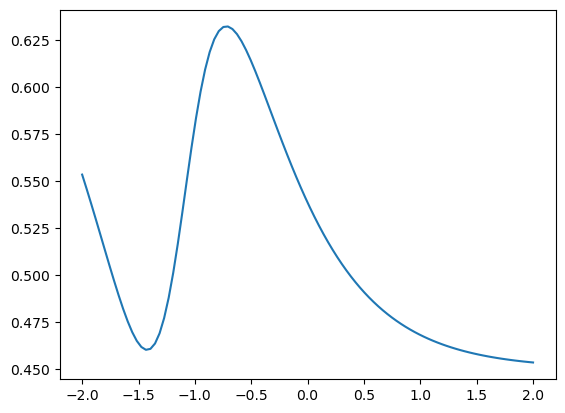

In [33]:
def sigmoid(x):
  return 1/(1+np.exp(-x))


#Your code here...
x = np.linspace(-2, 2, 100)

net21 = 6 * x + 6.5
y1 = sigmoid(net21)

net22 = 1.7 * x + 2
y2 = sigmoid(net22)

net31 = 2 * y1 -3 * y2  +0.8
z1 = sigmoid(net31)

plt.plot(x, z1)


In [36]:
help(np.array)
np.array()

fig,ax = plt.subplots()
plt.contourf()
plt.

Help on built-in function array in module numpy:

array(...)
    array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
          like=None)

    Create an array.

    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        ``__array__`` method returns an array, or any (nested) sequence.
        If object is a scalar, a 0-dimensional array containing object is
        returned.
    dtype : data-type, optional
        The desired data-type for the array. If not given, NumPy will try to use
        a default ``dtype`` that can represent the values (by applying promotion
        rules when necessary.)
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if ``__array__`` returns a copy, if obj is a nested
        sequence, or if a copy is needed to satisfy any of the other
        requirements (``dtype``, ``order``, etc.).
  